# **Problem Statement and Information on Netflix**
Netflix is one of the most popular streaming services in the world, providing users with access to a
vast collection of TV shows and movies. The platform has gained a massive following in recent years,
and its popularity shows no signs of slowing down.

 We’ll be using Python to perform exploratory
data analysis (EDA) on Netflix dataset. We’ll be using various Python libraries, including Pandas,
NumPy, Matplotlib, and Seaborn to visualize and analyze the data.
Objective is to gain valuable insights into the content on Netflix.

These insights should help Netflix
make better decisions about which type of shows/movies to produce and how they can grow the
business in different countries.


# **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# **2.Exploring Data**

In [ ]:
df = pd.read_csv("/content/netflix.csv",parse_dates=['date_added'])

In [ ]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5535,s5536,Movie,Kevin Hart: What Now?,Leslie Small,"Kevin Hart, Don Cheadle, Halle Berry, Ed Helms...",United States,"April 11, 2017",2016,R,96 min,Stand-Up Comedy,Frenetic comic Kevin Hart hits Philadelphia an...
148,s149,TV Show,HQ Barbers,Gerhard Mostert,"Hakeem Kae-Kazim, Chioma Omeruah, Orukotan Ade...",NaN,"September 1, 2021",2020,TV-14,1 Season,TV Shows,When a family run barber shop in the heart of ...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
2816,s2817,TV Show,100 Humans,NaN,"Zainab Johnson, Sammy Obeid, Alie Ward",United States,"March 13, 2020",2020,TV-14,1 Season,"Docuseries, Science & Nature TV",One hundred hardy souls from diverse backgroun...
7090,s7091,Movie,InuYasha: The Movie 2: The Castle Beyond the L...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu..."


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**

# **A. Graphical Analysis**

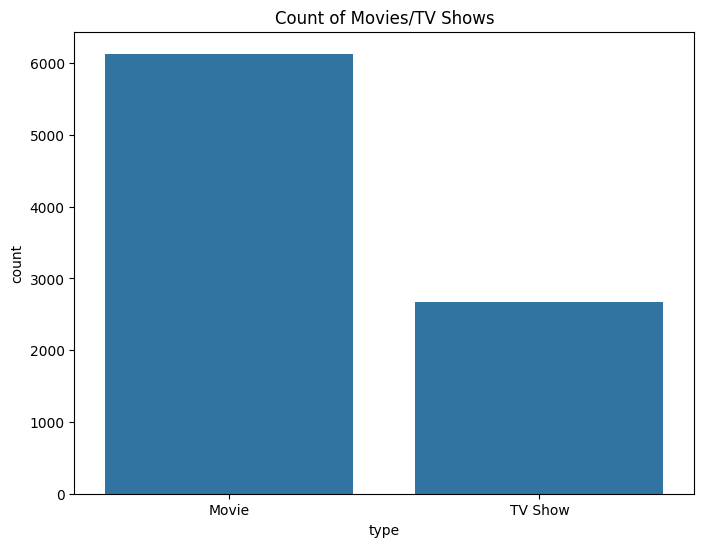

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.title('Total Count of Movies & TV Shows')
plt.show()

# **B. Non-Graphical Analysis**

In [ ]:
counts = df['type'].value_counts()
print(counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


# **Insights:** What can we expect from this Graphical and non graphical analysis?

*   It shows the number of Movies and TV shows present in
the dataset.
*   There are 6131 Movies
*   There are  2676 TV shows


# **3. What is the best time to launch a TV show?**

# a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

  # b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['week'] = df['date_added'].dt.isocalendar().week
df['month'] = df['date_added'].dt.month

# a. Best week for TV shows
tv_shows = df[df['type'] == 'TV Show']
best_week_shows = tv_shows.groupby('week')['title'].count().reset_index().sort_values('title', ascending=False).head(1)
print("Best week to release a TV show:")
print(best_week_shows)

# b. Best month for TV shows
best_month_shows = tv_shows.groupby('month')['title'].count().reset_index().sort_values('title', ascending=False).head(1)
print("Best month to release a TV show:")
print(best_month_shows)


Best week to release a TV show:
    week  title
26    27     85
Best month to release a TV show:
   month  title
6    7.0    254


In [ ]:
# a. Best week for movies
movies = df[df['type'] == 'Movie']
best_week_movies = movies.groupby('week')['title'].count().reset_index().sort_values('title', ascending=False).head(1)
print("Best week to release a movie:")
print(best_week_movies)

# b. Best month for movies
best_month_movies = movies.groupby('month')['title'].count().reset_index().sort_values('title', ascending=False).head(1)
print("Best month to release a movie:")
print(best_month_movies)

Best week to release a movie:
   week  title
0     1    316
Best month to release a movie:
   month  title
6    7.0    565


This code will:



*   Load the data and parse the 'date_added' column as datetime
*  Extract the week and month from 'date_added' into new columns

*   For TV shows:
    
  
   Group by week, count titles, and find the week with the highest count.

  Group by month, count titles, and find the month with the highest count
*   For Movie :

   Group by week, count titles, and find the week with the highest count.

  Group by month, count titles, and find the month with the highest count


# The output will show the best week and best month to launch a TV show and a movie based on the historical data.

Note that this analysis assumes more titles released in a particular week/month indicates it's the "best" time for a launch.






# **Un-nesting the columns**

In [ ]:
df['cast'] = df['cast'].str.split(',')
df = df.explode('cast')
df['listed_in'] = df['listed_in'].str.split(',')
df = df.explode('listed_in')
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['director'] = df['director'].str.split(',')
df = df.explode('director')

1. To convert the 'cast' column to a list of values, i used df['cast'] = df['cast'].str.split(','). This splits the values in the 'cast' column by comma , and creates a list of values for each row.
2. To unnest the 'cast' column, i used df = df.explode('cast', ignore_index=True).
3. The explode function creates a new row for each element in the list-like column, and ignore_index=True resets the index after the explode operation.
4. i repeated the same process for the 'listed_in','country' and 'director' columns by first converting it to a list of values using df['listed_in'] = df['listed_in'].str.split(','),df['country'] = df['country'].str.split(','),df['director'] = df['director'].str.split(',').
5. Then, i unnested the 'listed_in' column using df = df.explode.

# **Handling null values**

## A. Categorical variable

In [ ]:
categorical_cols = ['director', 'cast', 'country']
for col in categorical_cols:
    df[col] = df[col].fillna(f'Unknown_{col}')


##B. Continuous variables


In [ ]:
continuous_cols = ['release_year', 'duration']
for col in continuous_cols:
    df[col] = df[col].fillna(0)

1. For categorical variables (like 'cast', 'director', 'country', etc.),replace it with null values with f'Unknown_{col}' using fillna().
2. For continuous variables (like 'release_year', 'duration'),replace it with null values with 0 using fillna(0).

# **2.Comparison of Tv Shows v/s Movies.**

# A. Find the number of movies produced in each country and pick the top 10 countries.

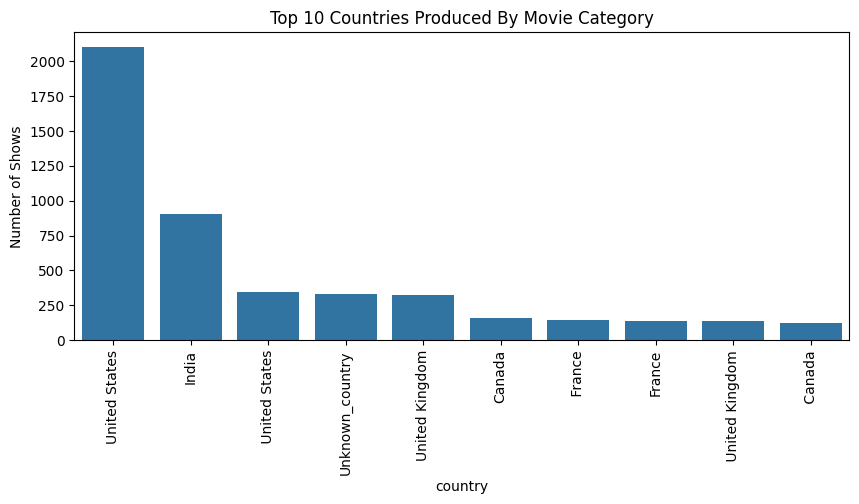

Top 10 Countries Produced By Movie Category
             country  show_id
170    United States     2102
125            India      902
94     United States      345
171  Unknown_country      333
169   United Kingdom      325
108           Canada      162
30            France      146
117           France      139
93    United Kingdom      137
16            Canada      125


In [ ]:
 top10_country_movies = df.loc[df["type"]=="Movie"]
top10_country_movies = top10_country_movies.groupby("country")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="country",y="show_id",data = top10_country_movies )
plt.title("Top 10 Countries Produced By Movie Category")
plt.xticks(rotation=90)
plt.ylabel("Number of Shows")
plt.show()

print("Top 10 Countries Produced By Movie Category")
print(top10_country_movies)


## **Insight:** In this analysis i used both graphical and non graphical analysis


*   in this analysis shows the top 10 countiresproduced by  movie category
*   in this analysis we can see that United States produced 2102 movies followed by India with 902.



# B. Find the number of Tv-Shows produced in each country and pick the top 10 countries.

<ipython-input-114-85d4c3f94b20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country",y="show_id",data = top10_country_tvshows, palette ="deep" )


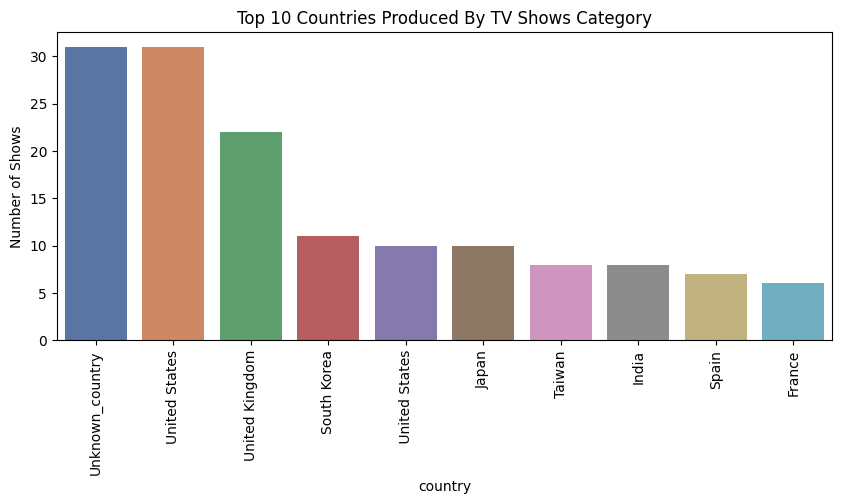

Top 10 Countries:
            country  show_id
43  Unknown_country       31
42    United States       31
41   United Kingdom       22
36      South Korea       11
16    United States       10
28            Japan       10
38           Taiwan        8
26            India        8
37            Spain        7
25           France        6


In [ ]:
top10_country_tvshows = df.loc[df["type"]=="TV Show"]
top10_country_tvshows = top10_country_tvshows.groupby("country")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="country",y="show_id",data = top10_country_tvshows, palette ="deep" )
plt.title("Top 10 Countries Produced By TV Shows Category")
plt.xticks(rotation=90)
plt.ylabel("Number of Shows")
plt.show()

print("Top 10 Countries:")
print(top10_country_tvshows)



* in this analysis shows the top 10 countires by number of unique tv shows titles
*   in this analysis we can see that United States produced 31 tv shows followed by United kingdom with 22 Tv show
* whereas India has 8 tv shows and france as less unique titles with 6 tv shows.

# **4. Analysis of actors/directors of different types of shows/movies.**
# a. Identify the top 10 directors who have appeared in most movies or TV shows.

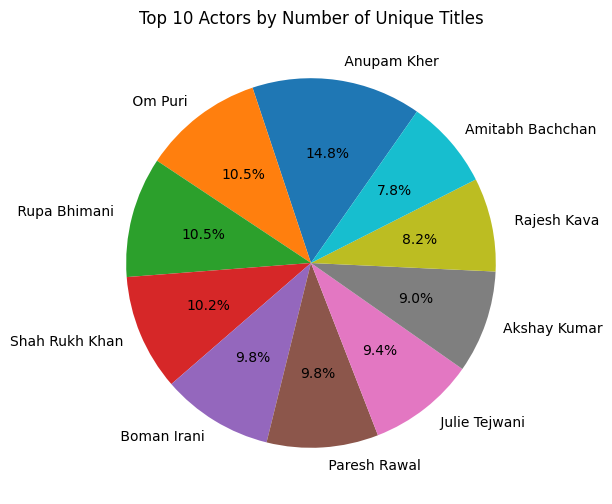

Top 10 Actors:
                   cast  title
1998        Anupam Kher     38
17280           Om Puri     27
19806      Rupa Bhimani     27
28088    Shah Rukh Khan     26
3196        Boman Irani     25
17537      Paresh Rawal     25
11517     Julie Tejwani     24
24986      Akshay Kumar     23
18632       Rajesh Kava     21
25070  Amitabh Bachchan     20


In [ ]:
top_actors = df.groupby('cast')['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)
df = df[df['cast'] != 'Unknown_cast']

plt.figure(figsize=(10,6))
plt.pie(top_actors['title'], labels=top_actors['cast'], autopct='%1.1f%%',startangle=55)
plt.title('Top 10 Actors by Number of Unique Titles')
plt.show()

print("Top 10 Actors:")
print(top_actors)

In [ ]:
my_tuple = ('sara', 6, 5, 0.97)
my_list = ['sara', 6, 5, 0.97]
print(my_tuple[0]) # output => 'sara'
print(my_list[0]) # output => 'sara'
my_tuple[0] = 'ansh' # modifying tuple => throws an error
my_list[0] = 'ansh' # modifying list => list modified
print(my_tuple[0]) # output => 'sara'
print(my_list[0])

sara
sara


TypeError: 'tuple' object does not support item assignment

# As per the graphical analysis and non-graphocal analysis
  

* For Non-graphical analysis i have grouped the data by 'cast' column and count the unique titles using nunique() for each actor.
*    Then i sorted the result of df in descending order by the 'title' column and take the top 10 rows using head(10).

*    For Graphical Analysis i ploted the pie plot for better understanding where we can see the visuals of the top 10 actors by number of unique titles







# b. Identify the top 10 directors who have appeared in most movies or TV shows.

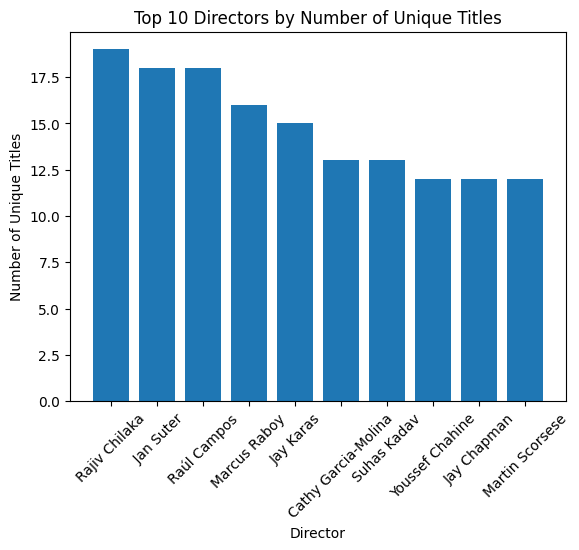

The top 10 directors:
                 director  title
3622        Rajiv Chilaka     19
211             Jan Suter     18
3667          Raúl Campos     18
2898         Marcus Raboy     16
2188            Jay Karas     15
1206  Cathy Garcia-Molina     13
4208          Suhas Kadav     13
4599      Youssef Chahine     12
2185          Jay Chapman     12
2958      Martin Scorsese     12


In [ ]:
df = df[df['director'] != 'Unknown_director']
top_directors = df.groupby('director')['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)
plt.bar(top_directors['director'], top_directors['title'])
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Number of Unique Titles')
plt.title('Top 10 Directors by Number of Unique Titles')
plt.show()
print("The top 10 directors:")
print(top_directors)

# As per the graphical analysis and non-graphical analysis

*   for non-graphical analysis i grouped the data by 'director' column and count the unique titles using nunique() for each director. We then sort the resulting DataFrame in descending order by the 'title' column and take the top 10 rows using head(10).
*   For Graphical analysis i ploted the bar plot for better understanding where we can see the visuals of the top 10 directors by number of unique titles



# **5.1 Which genre movies are more popular or produced**

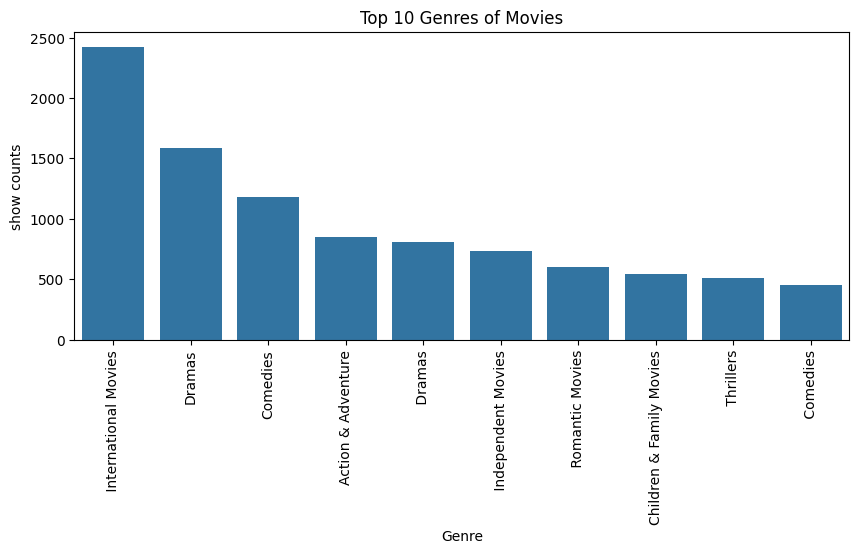

Top 10 Genres of Movies
                   listed_in  show_id
10      International Movies     2426
25                    Dramas     1586
22                  Comedies     1184
18        Action & Adventure      848
6                     Dramas      812
9         Independent Movies      731
13           Romantic Movies      601
20  Children & Family Movies      548
17                 Thrillers      510
3                   Comedies      452


In [ ]:
top10_genre_movies = df.loc[df["type"]=="Movie"]
top10_genre_movies = top10_genre_movies.groupby("listed_in")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="listed_in",y="show_id",data=top10_genre_movies)
plt.title("Top 10 Genres of Movies")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("show counts")
plt.show()

print("Top 10 Genres of Movies")
print(top10_genre_movies)


# **Insights:**  As per the graphical analysis and non-graphical analysis


*   For Graphical analysis This results a bar plot showing the popularity of genres based on the Movies produced associated with each genre.
*   For non-graphical analysis we get the exact number of popularity based on genre we can see that i have two columns showing both Show id and genre.



# **5.2. Which genre Tv Shows are more popular or produced**

<ipython-input-131-601ab0fece37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="listed_in",y="show_id",data=top10_genre_tvshow, palette = "deep")


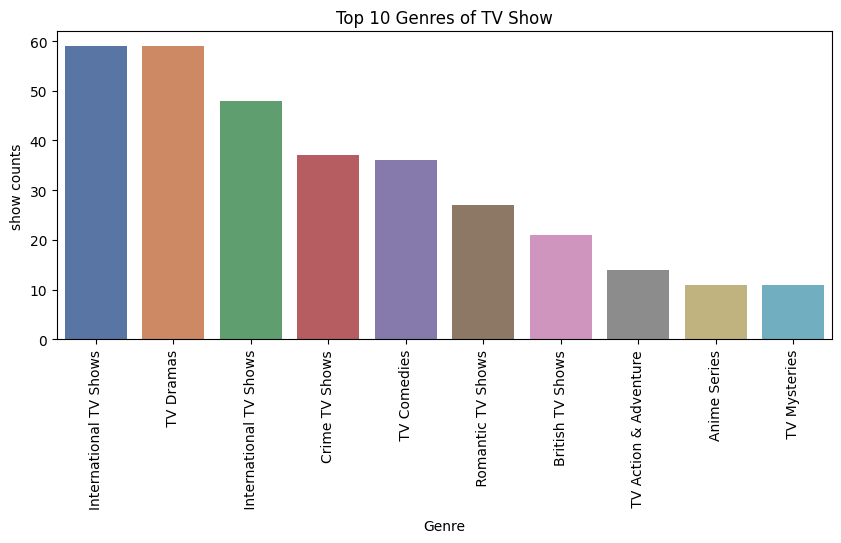

Genre Popularity:
                  listed_in  show_id
24   International TV Shows       59
13                TV Dramas       59
3    International TV Shows       48
22           Crime TV Shows       37
12              TV Comedies       36
7         Romantic TV Shows       27
20         British TV Shows       21
11    TV Action & Adventure       14
19             Anime Series       11
15             TV Mysteries       11


In [ ]:
top10_genre_tvshow = df.loc[df["type"]=="TV Show"]
top10_genre_tvshow = top10_genre_tvshow.groupby("listed_in")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x="listed_in",y="show_id",data=top10_genre_tvshow, palette = "deep")
plt.title("Top 10 Genres of TV Show")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("show counts")
plt.show()

print("Genre Popularity:")
print(top10_genre_tvshow)

# As per the graphical analysis and non-graphical analysis


*   For Graphical analysis This results a bar plot showing the popularity of genres based on the Tv Shows produced associated with each genre.
*   For non-graphical analysis we get the exact number of popularity based on genre we can see that i have two columns showing both Show id and genre.



# **Frequency of Movies/TV Shows Released By Year**

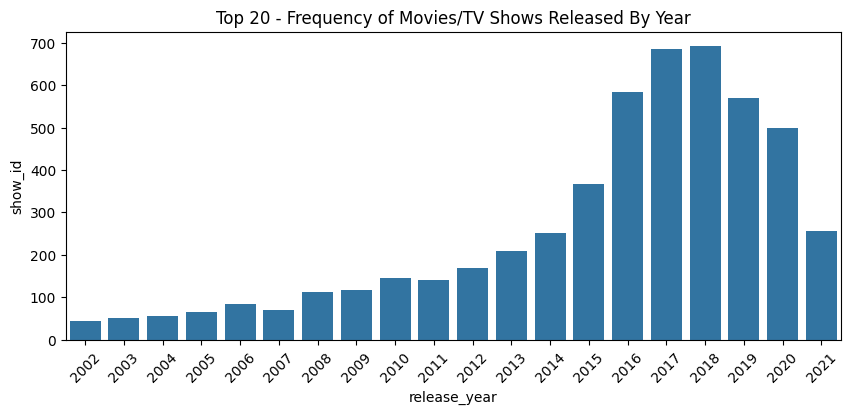

In [ ]:
shows_by_year = df.groupby("release_year")["show_id"].nunique().reset_index().sort_values("show_id",ascending=False).head(20)
plt.figure(figsize=(10,4))
plt.title("Top 20 - Frequency of Movies/TV Shows Released By Year")
sns.barplot(x="release_year",y="show_id", data=shows_by_year)
plt.xticks(rotation=45)
plt.show()

# **Insights:**
- This bar plot shows the frequency of Movies & TV shows
released in different years. The plot shows the 20 most common years with the
count of Movies & TV shows together for each year shown on the y-axis. 2018
is the year where most number of movies and shows being released followed by
others. So from the plot its evident that from 2015 onwards more number of
shows started releasing.


# **6. Find After how many days the movie will be added to Netflix after the release of the movie** (you can consider the recent past data)

In [ ]:
df['release_date'] = pd.to_datetime(df['release_year'], errors='coerce', format='%Y')

df['netflix_release'] = (pd.to_datetime(df['date_added'], errors='coerce') - df['release_date']).dt.days

mode_days = df['netflix_release'].mode()[0]

print(f"Most movies are added to Netflix {mode_days} days after their release.")



Most movies are added to Netflix 1369.0 days after their release.


1. **I Calculated the difference in days between the movie's release date and the date it was added to Netflix.**
2. **next i Found the mode (most common value) of the 'netflix_release' column, which represents the typical number of days between a movie's release and its addition to Netflix.**

# **Soo as per the analysis Most movies are added to Netflix 1369.0 days after their release.**



# **Recommendations based on the insights and observations:**
1. The platform sees a higher addition of movies compared to TV shows. To expand viewership.
2. With a significant portion of content originating from the USA and India, there’s a clear
opportunity to capitalize on these regions. Additionally, exploring content from emerging
markets like the UK, Canada, and Korean shows could further diversify the platform’s offerings.
3. Analyzing the top 10 actors and directors whose content is not yet available on the platform
presents an opportunity to attract their fan bases and expand viewership.
4. Investing in Netflix original content production and collaborations with top actors and directors as per insights
